# Trader Behavior vs Market Sentiment – Hyperliquid Analysis

## Objective
The objective of this analysis is to examine how trader behavior and performance
vary across different Bitcoin market sentiment regimes (Fear, Greed, Extreme
Greed, and Neutral). By combining historical trade data with the Fear & Greed
Index, this study aims to uncover behavioral patterns that can inform smarter
trading strategies.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fear_greed = pd.read_csv('/fear_greed_index.csv')
trades = pd.read_csv('/historical_data.csv')

fear_greed.head(), trades.head()


/tmp/ipython-input-1514812816.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades = pd.read_csv('/historical_data.csv')


(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

## Data Preprocessing

To analyze the relationship between trader behavior and market sentiment, trade-level
data was aligned with the daily Fear & Greed Index. Trade timestamps were converted
to execution dates and merged with sentiment data using the date as the key.



In [ ]:
# Convert sentiment date
fear_greed['date'] = pd.to_datetime(fear_greed['date'])

# Convert trade timestamp (milliseconds to datetime)
trades['trade_time'] = pd.to_datetime(trades['Timestamp'], unit='ms')

# Extract date for merging
trades['date'] = trades['trade_time'].dt.date
trades['date'] = pd.to_datetime(trades['date'])

# Merge datasets
merged = trades.merge(
    fear_greed[['date', 'classification']],
    on='date',
    how='left'
)

# Quick validation
merged[['date', 'classification']].head()


,date,classification
0,2024-10-27,Greed
1,2024-10-27,Greed
2,2024-10-27,Greed
3,2024-10-27,Greed
4,2024-10-27,Greed


In [ ]:
merged.to_csv('merged_trades_sentiment.csv', index=False)


## Exploratory Data Analysis (EDA)

This section explores how trading activity and profitability vary across different
market sentiment regimes. The focus is on trade volume and average profitability
during Fear, Greed, Extreme Greed, and Neutral periods.



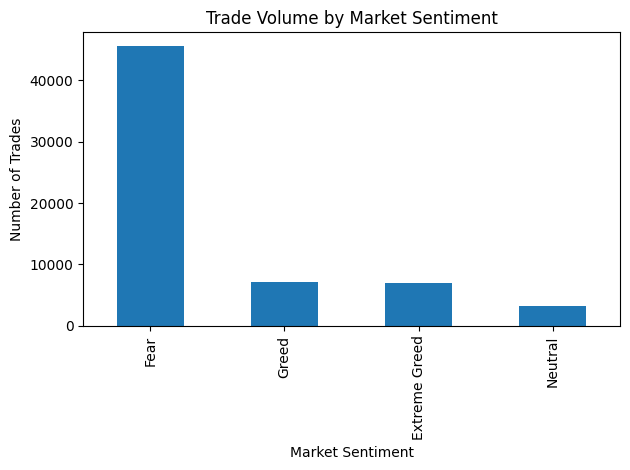

In [ ]:
trade_counts = merged['classification'].value_counts()

plt.figure()
trade_counts.plot(kind='bar')
plt.title('Trade Volume by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.tight_layout()
plt.show()


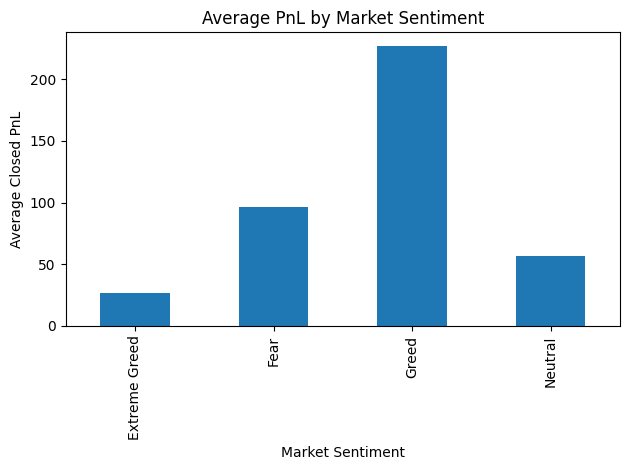

In [ ]:
avg_pnl = merged.groupby('classification')['Closed PnL'].mean()

plt.figure()
avg_pnl.plot(kind='bar')
plt.title('Average PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.tight_layout()
plt.show()


### EDA Observations

- Trading activity is highest during Fear periods, indicating increased market
participation during uncertainty.
- Average profitability per trade is highest during Greed periods, suggesting
strong momentum-driven opportunities.
- Extreme Greed shows reduced efficiency despite larger position sizes,
highlighting potential overconfidence.



## Aggregated Performance Analysis

To better understand trader behavior under different market conditions, key
performance metrics were aggregated by market sentiment, including trade volume,
average profitability, total profitability, and average trade size.



In [ ]:
summary = merged.groupby('classification').agg(
    total_trades=('Trade ID', 'count'),
    avg_pnl=('Closed PnL', 'mean'),
    total_pnl=('Closed PnL', 'sum'),
    avg_trade_size_usd=('Size USD', 'mean')
).reset_index()

summary


,classification,total_trades,avg_pnl,total_pnl,avg_trade_size_usd
0,Extreme Greed,6935,26.320044,1.825295e+05,5670.433771
1,Fear,45551,96.340531,4.388408e+06,8435.724519
2,Greed,7116,226.888265,1.614537e+06,8580.651029
3,Neutral,3207,56.800214,1.821583e+05,5769.113530


In [ ]:
summary.to_csv('sentiment_performance_summary.csv', index=False)


### Key Insights

1. Greed periods deliver the highest average profitability per trade, indicating
favorable momentum-driven market conditions.

2. Fear periods generate the highest total profit due to significantly higher
trading activity, suggesting that volatility creates scalable opportunities.

3. Extreme Greed is characterized by larger average trade sizes but lower
profitability efficiency, pointing toward overconfidence risk.

4. Neutral market conditions show lower participation and weaker performance,
reflecting reduced trader conviction.


### Strategic Implications

- Momentum-based strategies perform best during Greed phases.
- Volume and mean-reversion strategies may be more effective during Fear phases.
- Risk management should be tightened during Extreme Greed to prevent drawdowns.
- Capital deployment may be reduced during Neutral market regimes.

